In [1]:
import sys
import neal
import greedy
import tabu
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
current_path = Path().resolve()
sys.path.append(str(current_path / '../code/'))
from experiment import Experiment
from table import Table
from visualisation import Figure

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Multiple Knapsack Problem

## Load the data

In [2]:
data_folder = '../data/Multidimensional Knapsack/'
# Weish dataset has smallers problebls, WEING has larger problems.
# We have Weish[01-30] files in Weish folder. Load them.
weish_files_no = 30
weish_file_paths = ['weish//Weish'+ str(i).zfill(2) +'.npz' for i in range(1, weish_files_no + 1)]
weish_loaded_files = [np.load(data_folder + i) for i in weish_file_paths]
# We have WEING[1-8] files in Weing folder. Load them.
weing_files_no = 8
weing_file_paths = ['weing//WEING'+ str(i) +'.npz' for i in range(1, weing_files_no + 1)]
weing_loaded_files = [np.load(data_folder + i) for i in weing_file_paths]
# Merge the datasets and get the needed information.
loaded_files = weish_loaded_files + weing_loaded_files
qubo_sizes = [i['n'] for i in loaded_files]
objectives = [i['objective'] for i in loaded_files]
constraints = [i['constraint'] for i in loaded_files]
data = [qubo_sizes, objectives, constraints]

In [3]:
minimisation = False

## Simulated Annealing Run Length Distribution

100.0 %


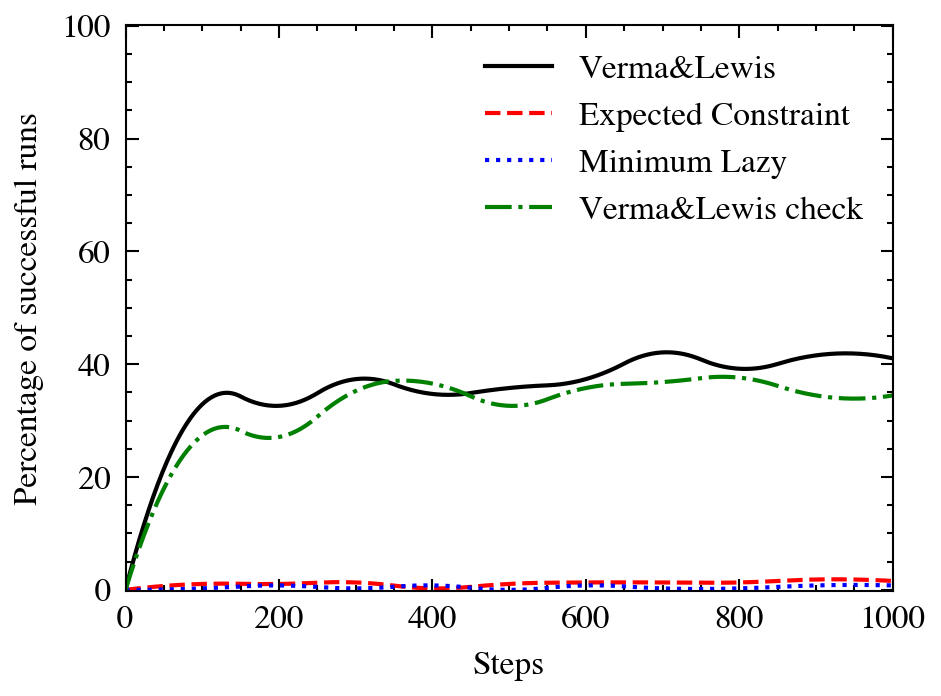

In [4]:
sa_sampler = neal.SimulatedAnnealingSampler()
dist = Figure.run_distribution(data, minimisation, sa_sampler, 1000, 100, num_reads=130, repeats=10)

## Tabu Search Run Time Distribution

100.0 %


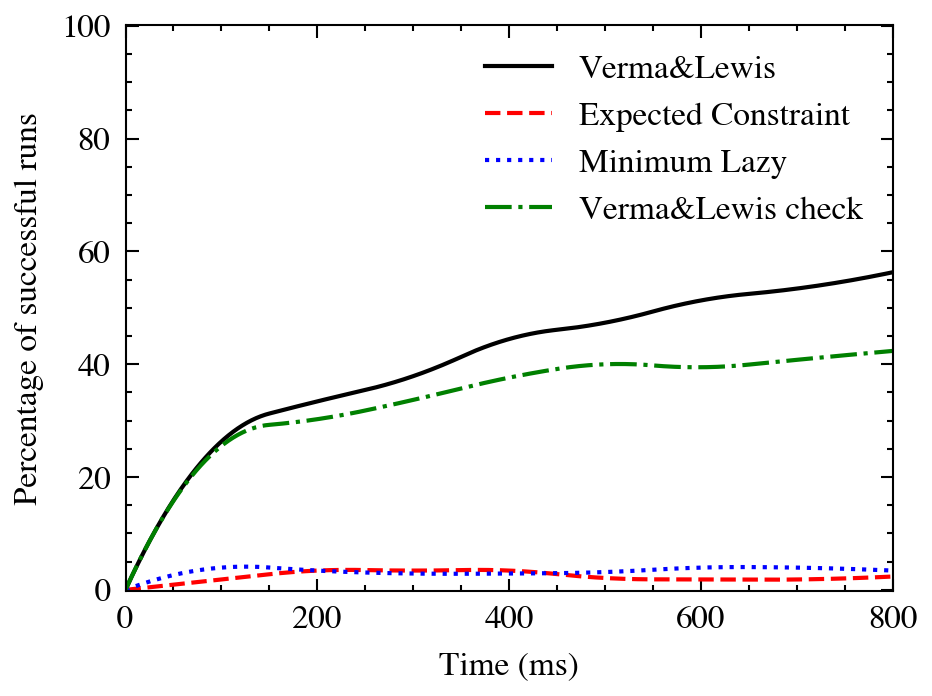

In [5]:
tabu_sampler = tabu.TabuSampler()
dist = Figure.run_distribution(data, minimisation, tabu_sampler, 800, 100, repeats=10)

# Quadratic Assignment Problem

## Load the data

In [6]:
data_folder = '../data/Quadratic Assignment Problem/'

file_names = ['had12.npz', 'had14.npz', 'had16.npz',
             'had18.npz', 'had20.npz', 'rou12.npz',
             'rou15.npz', 'rou20.npz', 'tai40a.npz',
             'tai40b.npz']

loaded_files = [np.load(data_folder + file) for file in file_names]

obj_qubos = [i['cost_function_qubo'] for i in loaded_files]
obj_constants = [i['cost_function_constant'] for i in loaded_files]
con_qubos = [i['constraint_function_qubo'] for i in loaded_files]
con_constants = [i['constraint_function_constant'] for i in loaded_files]

data = [obj_qubos, obj_constants, con_qubos, con_constants]

In [7]:
minimisation = True

## Simulated Annealing Run Length Distribution

100.0 %


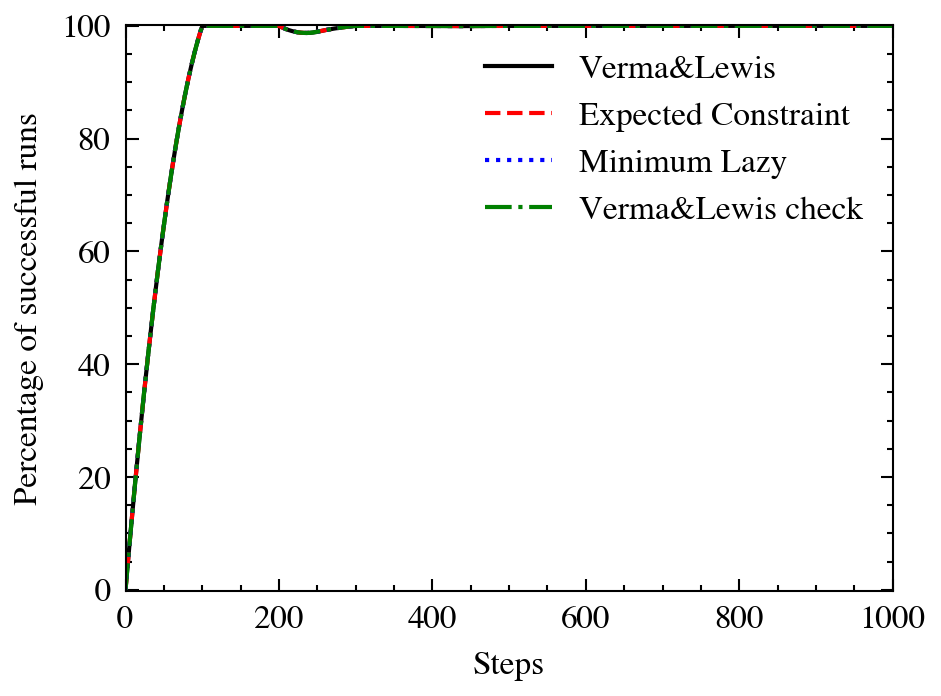

In [8]:
sa_sampler = neal.SimulatedAnnealingSampler()
dist = Figure.run_distribution(data, minimisation, sa_sampler, 1000, 100, num_reads=30, repeats=10)

## Tabu Search Run Time Distribution

100.0 %


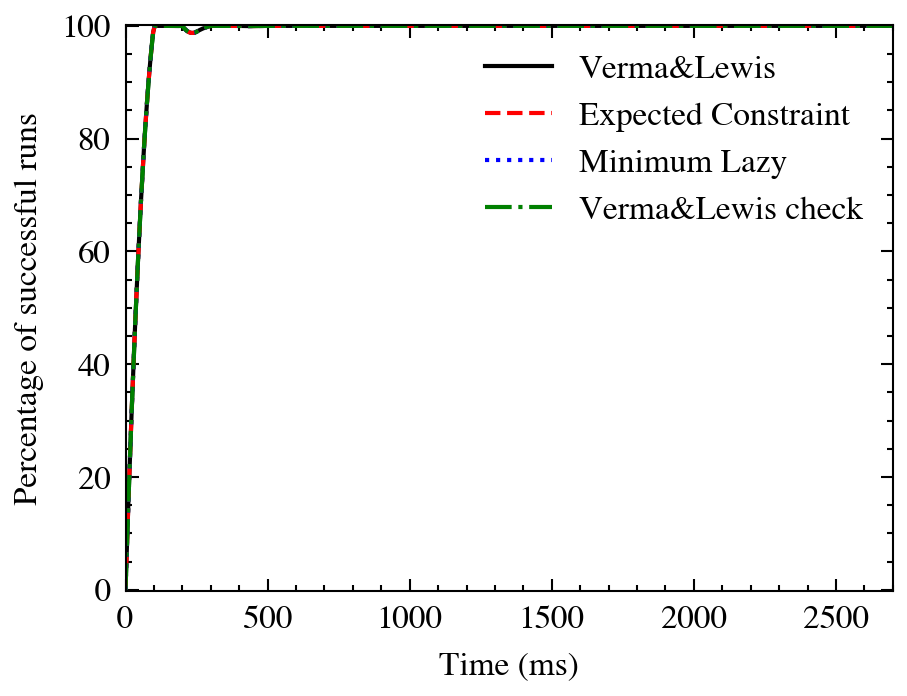

In [9]:
tabu_sampler = tabu.TabuSampler()
dist = Figure.run_distribution(data, minimisation, tabu_sampler, 2700, 100, repeats=10)

# Travelling Salesman Problem

## Load the data

In [10]:
data_folder_s = '../data/Travelling Salesman Problem/Small/'
data_folder_l = '../data/Travelling Salesman Problem/Large/'

file_names_s = ['bayg29.npz', 'bays29.npz', 'dantzig42.npz',
                'fri26.npz', 'gr17.npz', 'gr21.npz', 'gr24.npz']
file_names_l = ['berlin52.npz', 'brazil58.npz', 'st70.npz']

loaded_files_s = [np.load(data_folder_s + file) for file in file_names_s]
loaded_files_l = [np.load(data_folder_l + file) for file in file_names_l]
loaded_files = loaded_files_s + loaded_files_l

obj_qubos = [i['cost_function_qubo'] for i in loaded_files]
obj_constants = [i['cost_function_constant'] for i in loaded_files]
con_qubos = [i['constraint_function_qubo'] for i in loaded_files]
con_constants = [i['constraint_function_constant'] for i in loaded_files]

data = [obj_qubos, obj_constants, con_qubos, con_constants]

In [11]:
minimisation = True

## Simulated Annealing Run Length Distribution

We have large and small TSP problems, and with both we have used unique hyperparameters. Here we will use hyperparameters of small problems as there is more of them and hyperparameters are larger due to the fact that smaller problems take less time to run. Thus, the runtimes will be a little inflated, but the results will be more fair.

100.0 %


,index,Steps,Successful Percentage,Algorithm
0,0,0.0,0.0,Verma&Lewis
1,0,100.0,100.0,Verma&Lewis
2,0,200.0,100.0,Verma&Lewis
3,0,300.0,100.0,Verma&Lewis
4,0,400.0,100.0,Verma&Lewis
5,0,500.0,100.0,Verma&Lewis
6,0,600.0,100.0,Verma&Lewis
7,0,700.0,100.0,Verma&Lewis
8,0,800.0,100.0,Verma&Lewis
9,0,900.0,100.0,Verma&Lewis


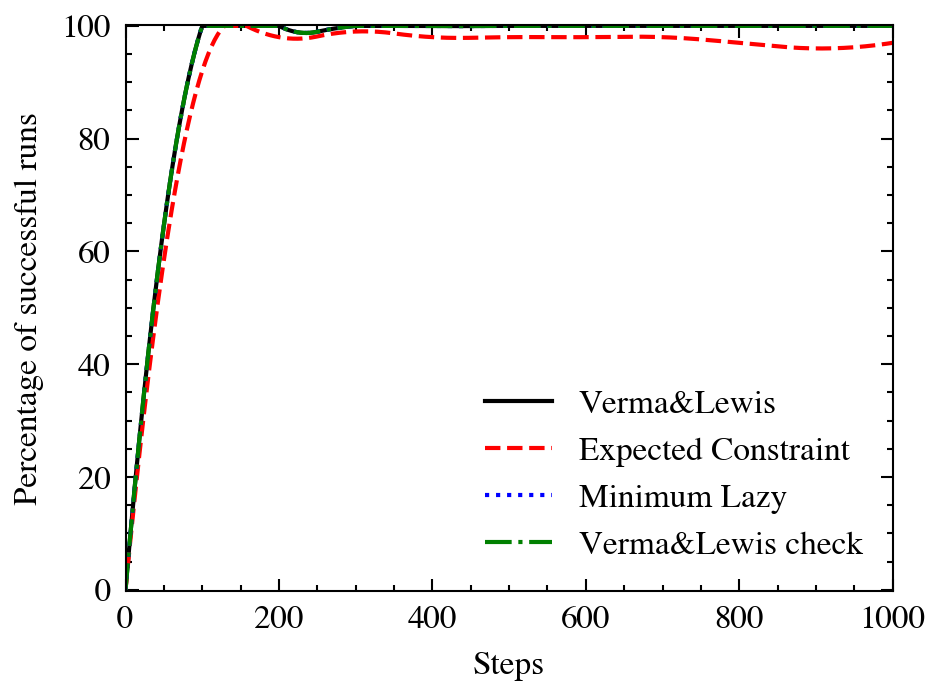

In [12]:
sa_sampler = neal.SimulatedAnnealingSampler()
Figure.run_distribution(data, minimisation, sa_sampler, 1000, 100, num_reads=30, repeats=10)

## Tabu Search Run Time Distribution

We have already seen that the standard number of steps is too large for SA. Let's just reduce it straight away for TS too so we do not have to way few days for the run to complete.

100.0 %


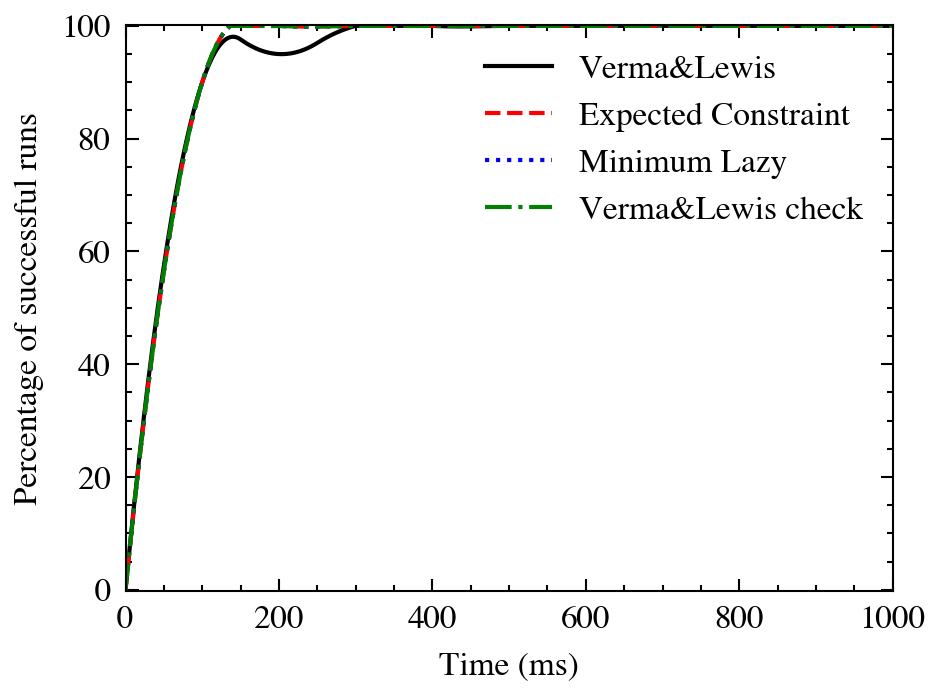

In [16]:
tabu_sampler = tabu.TabuSampler()
dist = Figure.run_distribution(data, minimisation, tabu_sampler, 1000, 100, repeats=10)